In [1]:
#Import Pandas and load the data set
import pandas as pd
df = pd.read_csv('hotel_bookings.csv')

#Display the first five rows to ensure it loaded correctly
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0.0,342.0,2015.0,July,27.0,1.0,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01/07/2015
1,Resort Hotel,0.0,737.0,2015.0,July,27.0,1.0,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01/07/2015
2,Resort Hotel,0.0,7.0,2015.0,July,27.0,1.0,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,02/07/2015
3,Resort Hotel,0.0,13.0,2015.0,July,27.0,1.0,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,02/07/2015
4,Resort Hotel,0.0,14.0,2015.0,July,27.0,1.0,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,03/07/2015


In [2]:
#Check to verify the entire dataset has been loaded 
df.shape

(119394, 32)

In [3]:
#Check for missing values in the dataset
missing_values = df.isnull()
print (missing_values)

        hotel  is_canceled  lead_time  arrival_date_year  arrival_date_month  \
0       False        False      False              False               False   
1       False        False      False              False               False   
2       False        False      False              False               False   
3       False        False      False              False               False   
4       False        False      False              False               False   
...       ...          ...        ...                ...                 ...   
119389  False        False      False              False               False   
119390  False        False      False              False               False   
119391  False        False      False              False               False   
119392  False        False      False              False               False   
119393  False        False      False              False               False   

        arrival_date_week_number  arriv

In [4]:
#Find out how many missing values under each variable 
missing_count = df.isnull().sum()
print (missing_count)

hotel                                  0
is_canceled                            6
lead_time                              1
arrival_date_year                     79
arrival_date_month                    79
arrival_date_week_number              79
arrival_date_day_of_month             79
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [5]:
#Remove columns with many missing values
df_cleaned = df.drop(columns=['agent', 'company', 'reservation_status_date'])

In [6]:
#Update the number of missing values in the cleaned data frame
missing_values = df_cleaned.isnull().sum()
print(missing_values)

hotel                               0
is_canceled                         6
lead_time                           1
arrival_date_year                  79
arrival_date_month                 79
arrival_date_week_number           79
arrival_date_day_of_month          79
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
children                            4
babies                              0
meal                                0
country                           488
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
days_in_waiting_list                0
customer_type                       0
adr                                 8
required_car

In [7]:
#Drop rows that have missing values in any column and make sure no more missing values remain
df_cleaned = df.dropna()
missing_values = df_cleaned.isnull().sum()
print(missing_values)

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [8]:
#Calculate the summary statistics for the numeric columns
df_cleaned.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,217.000000,217.000000,217.000000,217.000000,217.000000,217.00000,217.000000,217.000000,217.000000,217.0,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.0,217.000000,217.000000,217.000000
mean,0.078341,40.520737,2015.465438,38.198157,10.824885,1.56682,4.631336,1.410138,0.036866,0.0,0.069124,0.009217,0.147465,1.285714,202.617512,262.105991,0.0,63.793733,0.092166,0.198157
std,0.269329,61.748375,0.720053,12.890292,7.582065,1.49270,3.552846,0.520406,0.232788,0.0,0.254252,0.135769,0.717768,1.251454,111.487444,103.602708,0.0,38.823568,0.289929,0.546365
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.00000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,5.000000,9.000000,0.0,0.000000,0.000000,0.000000
25%,0.000000,12.000000,2015.000000,33.000000,6.000000,0.00000,2.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,185.000000,281.000000,0.0,40.000000,0.000000,0.000000
50%,0.000000,27.000000,2015.000000,45.000000,9.000000,2.00000,4.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,185.000000,281.000000,0.0,48.000000,0.000000,0.000000
75%,0.000000,36.000000,2016.000000,46.000000,13.000000,2.00000,6.000000,2.000000,0.000000,0.0,0.000000,0.000000,0.000000,2.000000,324.000000,281.000000,0.0,85.000000,0.000000,0.000000
max,1.000000,364.000000,2017.000000,53.000000,31.000000,9.00000,21.000000,3.000000,2.000000,0.0,1.000000,2.000000,7.000000,6.000000,444.000000,499.000000,0.0,246.000000,1.000000,3.000000


In [9]:
#Ensure df_cleaned is a deep copy of the original data frame to avoid any 'view' issues
df_cleaned = df.copy()

In [10]:
#Bring up the value counts for the categorical columns
print(df_cleaned['hotel'].value_counts())
print(df_cleaned['meal'].value_counts())
print(df_cleaned['customer_type'].value_counts())

hotel
City Hotel      79331
Resort Hotel    40063
Name: count, dtype: int64
meal
BB           92313
HB           14464
SC           10650
Undefined     1169
FB             798
Name: count, dtype: int64
customer_type
Transient          89617
Transient-Party    25124
Contract            4076
Group                577
Name: count, dtype: int64


In [11]:
#Transpose the summary statistics output so it is easier to read
df_cleaned.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119388.0,0.370431,0.482922,0.00,0.00,0.00,1.0,1.0
lead_time,119393.0,104.010872,106.861793,0.00,18.00,69.00,160.0,737.0
arrival_date_year,119315.0,2016.156753,0.707499,2015.00,2016.00,2016.00,2017.0,2017.0
arrival_date_week_number,119315.0,27.166165,13.604996,1.00,16.00,28.00,38.0,53.0
arrival_date_day_of_month,119315.0,15.799078,8.780512,1.00,8.00,16.00,23.0,31.0
stays_in_weekend_nights,119394.0,0.927618,0.998606,0.00,0.00,1.00,2.0,19.0
stays_in_week_nights,119394.0,2.500343,1.908300,0.00,1.00,2.00,3.0,50.0
adults,119394.0,1.856400,0.579257,0.00,2.00,2.00,2.0,55.0
children,119390.0,0.103886,0.398555,0.00,0.00,0.00,0.0,10.0
babies,119394.0,0.007948,0.097435,0.00,0.00,0.00,0.0,10.0


In [12]:
#Remove the negative ADR values so the results reflect real world behaviours
df_cleaned = df_cleaned[df_cleaned['adr'] > 0]

#Create a new variabled called'total_stay_nights' by combining 'stays_in_weekend_nights' and 'stays_in_week_nights'
df_cleaned['total_stay_nights'] = df_cleaned['stays_in_weekend_nights'] + df_cleaned['stays_in_week_nights']

In [13]:
#Find the cancellation count (for the 'is_canceled' column) and display
cancellation_counts = df_cleaned['is_canceled'].value_counts()
print(cancellation_counts)

is_canceled
0.0    73414
1.0    44006
Name: count, dtype: int64


In [14]:
#Calculate and display the cancellation rate by customer type
cancellation_rate_by_customer = df_cleaned.groupby('customer_type')['is_canceled'].mean()
print(cancellation_rate_by_customer)

customer_type
Contract           0.311281
Group              0.077206
Transient          0.412367
Transient-Party    0.257419
Name: is_canceled, dtype: float64


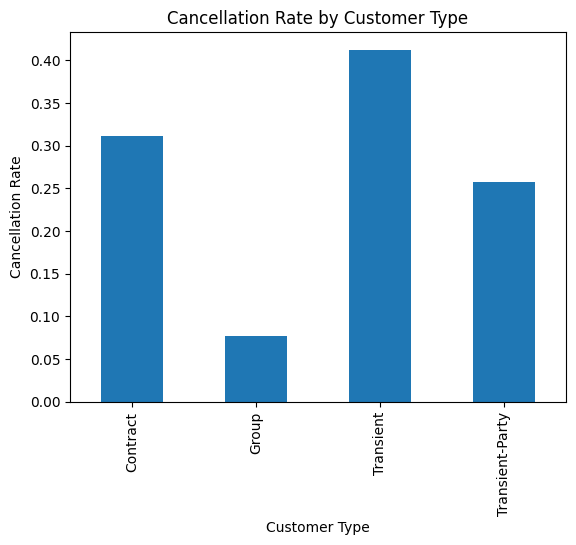

In [15]:
#Import matploblib so we can create visualisations with the results from the dataset 

import matplotlib.pyplot as plt

#Create a bar chart for the cancellation rate by customer type
cancellation_rate_by_customer.plot(kind='bar', title='Cancellation Rate by Customer Type')

#Set labels for the axes
plt.ylabel('Cancellation Rate')
plt.xlabel('Customer Type')

#Show the plot
plt.show()

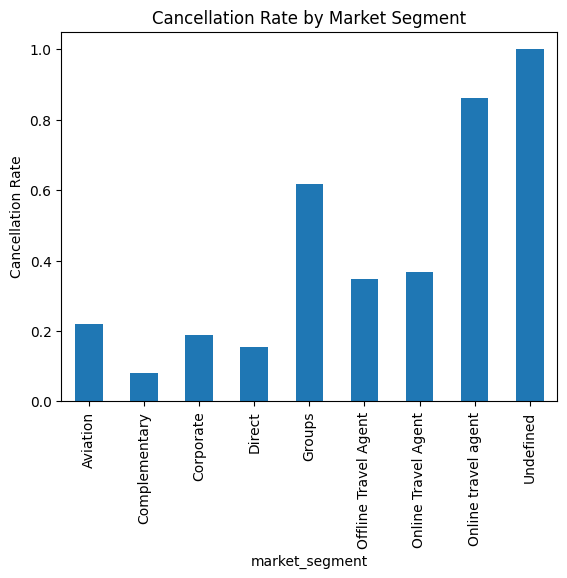

In [16]:
#Create a bar chart for the cancellation rate by market segment
cancellation_rate_by_segment = df_cleaned.groupby('market_segment')['is_canceled'].mean()
cancellation_rate_by_segment.plot(kind='bar', title='Cancellation Rate by Market Segment')
plt.ylabel('Cancellation Rate')
plt.show()

In [17]:
#Calculate the mean for canceled and non-canceled bookings
means_comparison = df_cleaned.groupby('is_canceled').mean(numeric_only=True)

#Round the means to 2 decimal places so its more straightforward to read
means_comparison_rounded = means_comparison.round(2)

#Rename the index to make it clearer
means_comparison_rounded.index = ['Non-Canceled (0)', 'Canceled (1)']

#Display a comparison table directly in the notebook
print(means_comparison_rounded)


                  lead_time  arrival_date_year  arrival_date_week_number  \
Non-Canceled (0)      81.03            2016.15                     27.04   
Canceled (1)         145.20            2016.17                     27.31   

                  arrival_date_day_of_month  stays_in_weekend_nights  \
Non-Canceled (0)                      15.85                     0.94   
Canceled (1)                          15.73                     0.93   

                  stays_in_week_nights  adults  children  babies  \
Non-Canceled (0)                  2.49    1.84      0.10    0.01   
Canceled (1)                      2.57    1.90      0.11    0.00   

                  is_repeated_guest  previous_cancellations  \
Non-Canceled (0)               0.04                    0.01   
Canceled (1)                   0.01                    0.21   

                  previous_bookings_not_canceled  booking_changes  agent  \
Non-Canceled (0)                            0.19             0.29  93.86   
Cancele

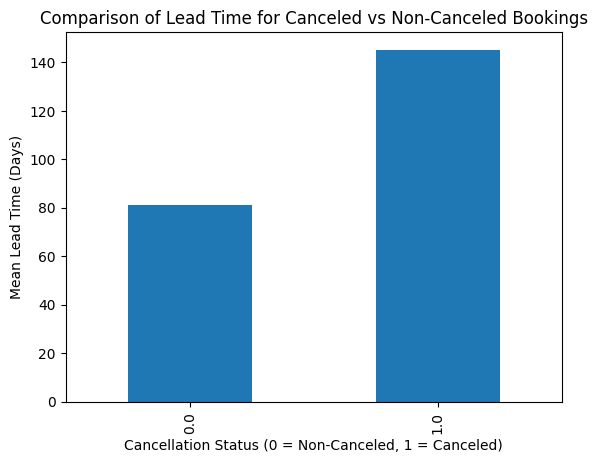

In [18]:
#Plotting the comparison of mean lead time for canceled vs non-canceled bookings
cancellation_comparison = df_cleaned.groupby('is_canceled')['lead_time'].mean()

#Show as a bar chart
cancellation_comparison.plot(kind='bar', title='Comparison of Lead Time for Canceled vs Non-Canceled Bookings')
plt.xlabel('Cancellation Status (0 = Non-Canceled, 1 = Canceled)')
plt.ylabel('Mean Lead Time (Days)')
plt.show()

The main question this report addresses is: ‘How do customers’ characteristics and booking behaviours influence hotel booking cancellations?’ 

Understanding and identifying the factors leading to higher cancellation rates allows hotels to implement targeted measures such as offering non-refundable stays to higher-risk customers, improving customer retention and optimising booking strategies.

This dataset includes valuable features that help identify patterns behind cancellations. Key variables such as customer type, lead time, ADR, previous cancellations and total stay nights were selected as they are likely to significantly impact whether a booking will be cancelled.

The analysis revealed that longer lead times are associated with higher cancellation rates. On average, cancelled bookings have a significantly higher lead time (145.20 days) compared to non-cancelled bookings (81.03 days). In addition, transient customers exhibit the highest cancellation rate (41.2%), while group bookings have the lowest rate (7.7%). This suggests that transient customers, who tend to book earlier and are more likely to change their plans, are more prone to cancellations. Furthermore, customers with previous cancellations are more likely to cancel again, with a mean value of 0.21 cancellations for cancelled bookings versus 0.01 for non-cancelled ones.

The following bar chart shows the cancellation rate by customer type, highlighting that transient customers are most likely to cancel their bookings. 

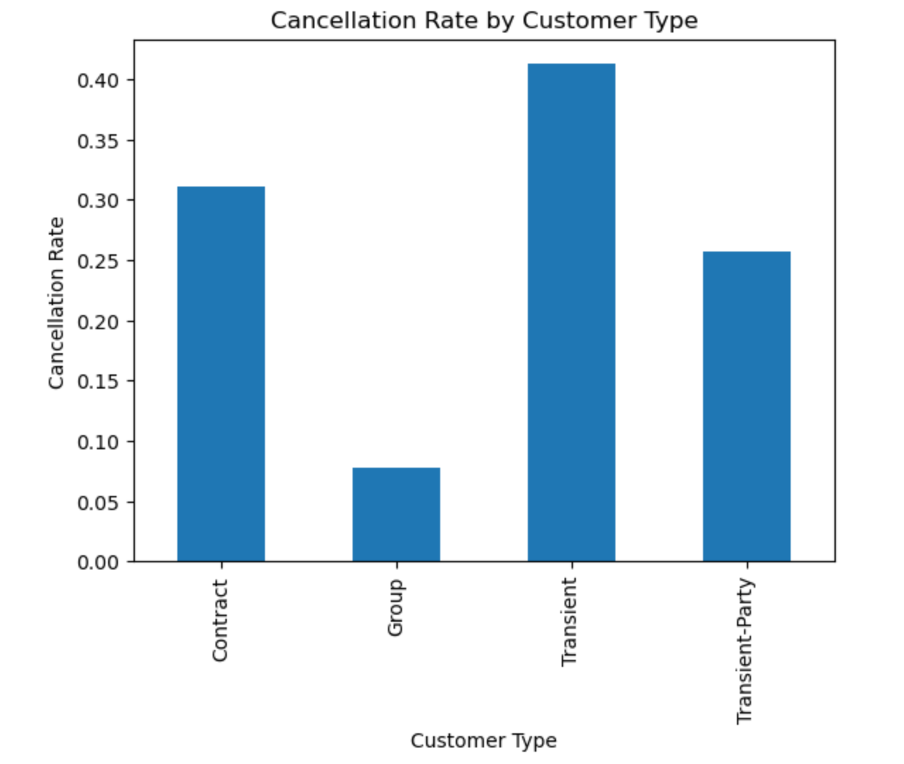



Overall mark: 62

#### Business Question:
A relevant business question is clearly stated. The significance of answering it is also explained. The findings are well data-supported, yet there are limited implications and actionable advices proposed according to the analysis.

<u>Good</u>

#### Data:
The variable selection is effective for answering the proposed question, and the rationale of selecting the variables are presented. Appropriate data filtering and grouping are used, showing good understanding of data manipulation. Some simple variable transformations are employed to create new useful variables.

<u>Very Good</u>

#### Visualization:
Multiple plots are presented for the visualization purpose. All plots come with essential elements of titles, axis labels and ticks, though the type of plots used is limited to bar chart only. Improvements could include using different types of plots, e.g. pie chart and line, to support your analysis.

<u>Good</u>

#### Code:
The code structure is clear and easy to follow overall, without errors. Comments are available along with the code. However, consider to hide those exploratory code that does not contribute directly to your analysis, which can improve the readability of the script.

<u>Very Good</u>